In [3]:
import matplotlib.pyplot as plt
%matplotlib qt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import DataFrame

from patsy import dmatrices

ImportError: Matplotlib qt-based backends require an external PyQt4, PyQt5,
or PySide package to be installed, but it was not found.

In [5]:
import pandas as pd
df = pd.read_csv("Data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df = df.drop(['Ticket','Cabin'], axis=1)

In [7]:
df = df.dropna()

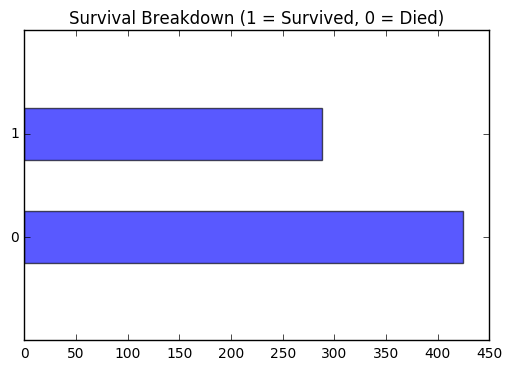

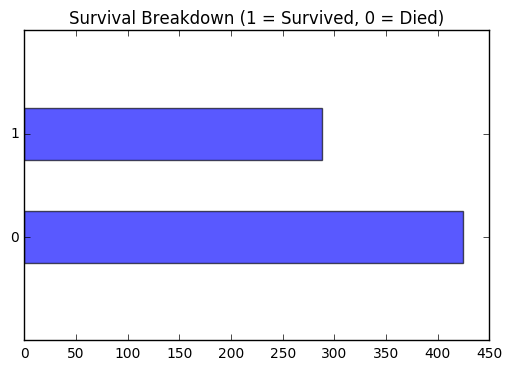

In [8]:
# 设定画图区域的大小
plt.figure(figsize=(6,4))

# fig代表是图像， ax 代表坐标轴
fig, ax = plt.subplots()

# 画出幸存者和遇难者的条状对比图
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)

# 限制 y 轴的取值范围
ax.set_ylim(-1, len(df.Survived.value_counts()))

# 加上标题 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

# 显示图像
fig

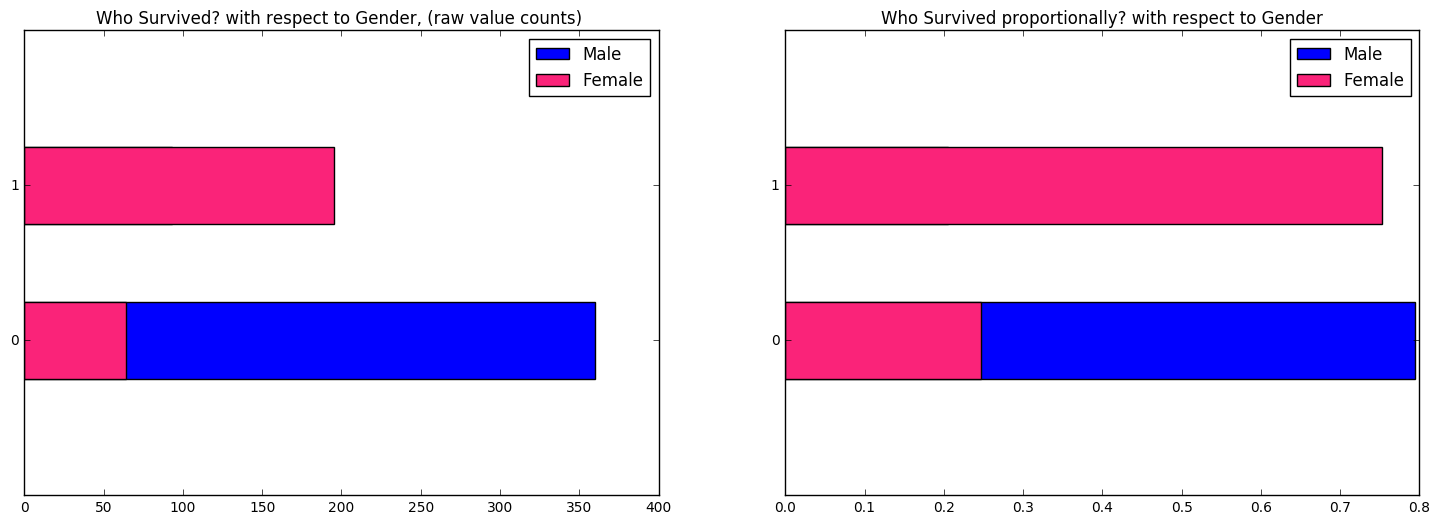

In [10]:
fig = plt.figure(figsize=(18,6))

# 各个性别幸存数量的关系对比

# add_subplot(121) 的意思是加入一个一行两列的子图，现在处理的是第一个子图
# 所以 ax1 代表的是第一个子图的坐标轴
ax1 = fig.add_subplot(121)

# 画出男性存活与否的条状图
df.Survived[df.Sex == 'male'].value_counts(sort=False).plot(kind='barh',label='Male')

# 画出女性存活与否的条状图
df.Survived[df.Sex == 'female'].value_counts(sort=False).plot(kind='barh', color='#FA2379',label='Female')
ax1.set_ylim(-1, 2) 
plt.title("Who Survived? with respect to Gender, (raw value counts) "); 
plt.legend(loc='best')

# 各个性别幸存率百分比关系
ax2 = fig.add_subplot(122)

# 画出男性存活与否的百分比条状图
(df.Survived[df.Sex == 'male'].value_counts(sort=False)/float(df.Sex[df.Sex == 'male'].size)).plot(kind='barh',label='Male') 

# 画出女性存活与否的百分比条状图
(df.Survived[df.Sex == 'female'].value_counts(sort=False)/float(df.Sex[df.Sex == 'female'].size)).plot(kind='barh', color='#FA2379',label='Female')

# 设置y轴的取值范围
ax2.set_ylim(-1, 2)
plt.title("Who Survived proportionally? with respect to Gender"); 
plt.legend(loc='best')

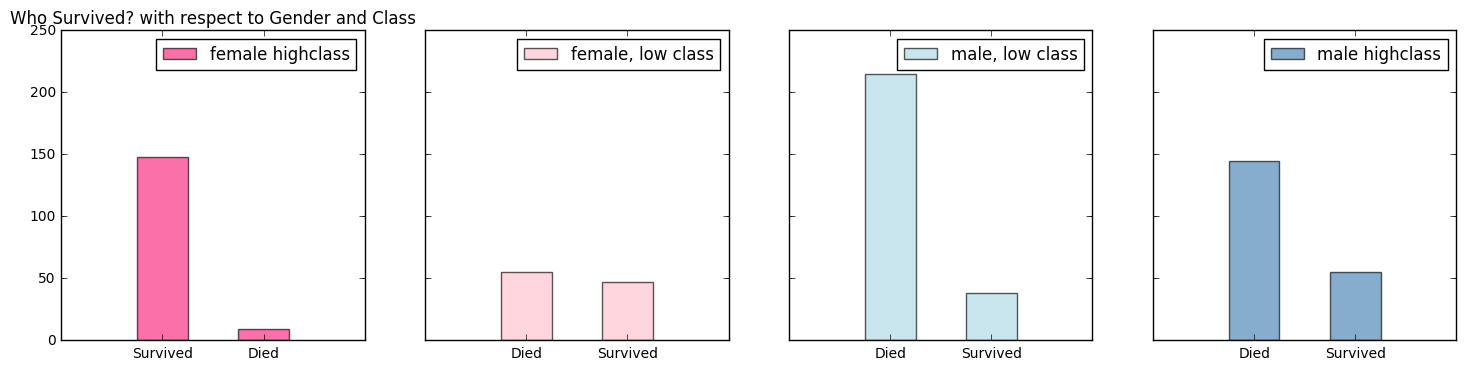

In [12]:
fig = plt.figure(figsize=(18,4))
alpha_level = 0.65

# 我们在男女分组的基础上根据阶级的不同来画条状图

# 女性高阶级
ax1=fig.add_subplot(141)
# 筛选出女性，阶级不等于3的，并通过 value_counts()函数来统计
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=alpha_level)

# 设置坐标轴上的显示
ax1.set_xticklabels(["Survived", "Died"], rotation=0)

# 设置x轴的取值范围
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

# 女性低阶级
ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

# 男性高阶级
ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

#男性低阶级
ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

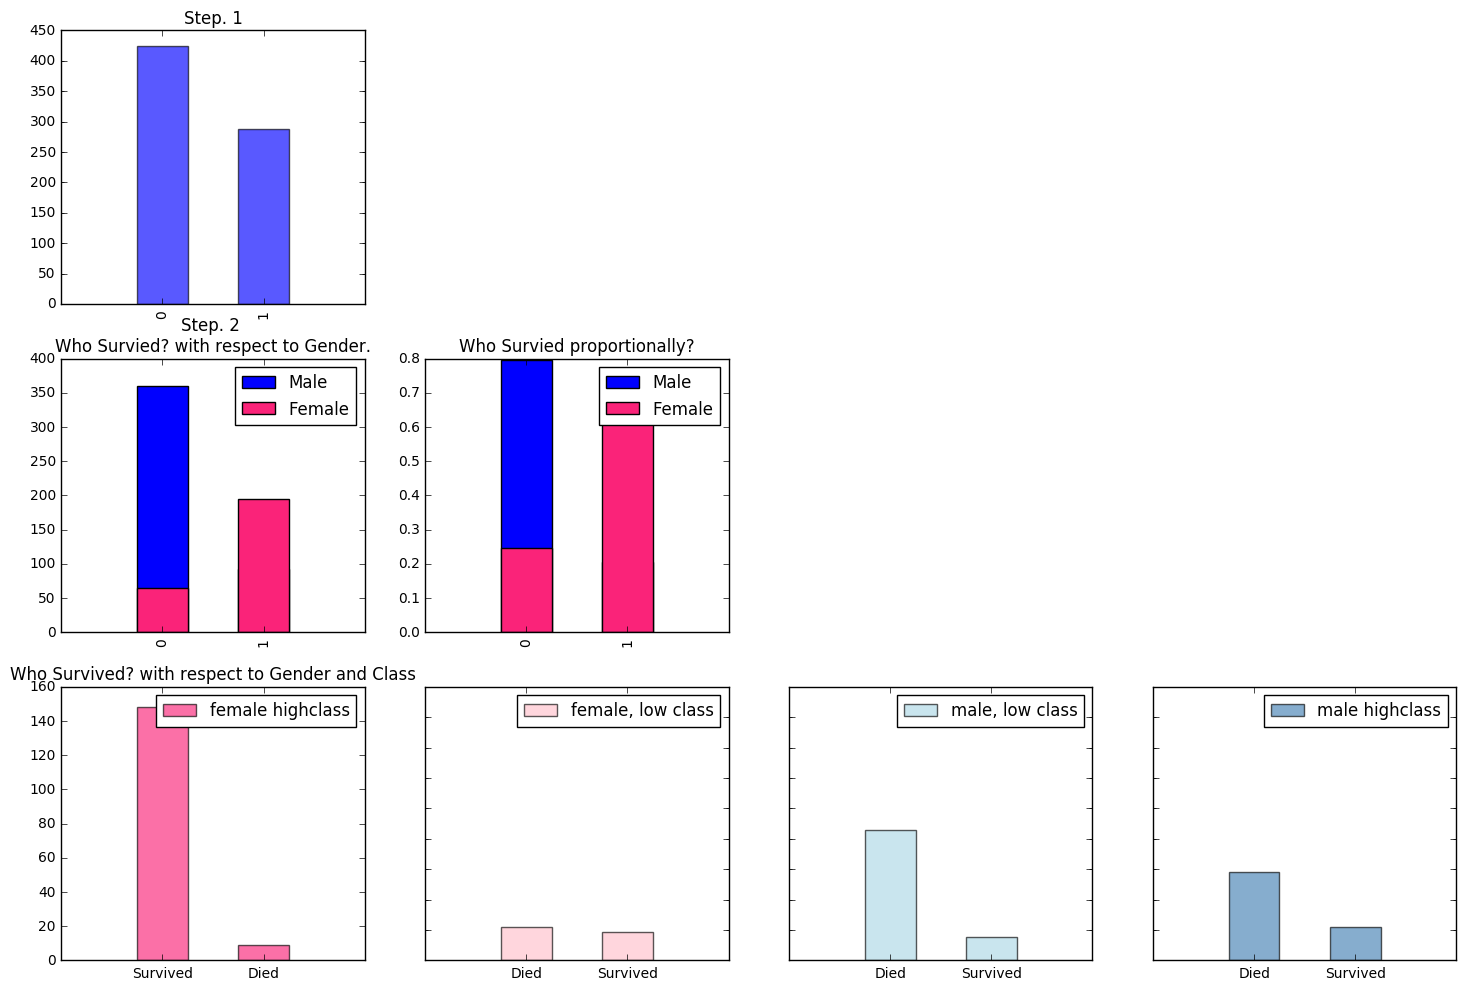

In [13]:
fig = plt.figure(figsize=(18,12))
a = 0.65
# 第一步

# 建立一组3行4列的子图，ax1是第一个子图的坐标轴
ax1 = fig.add_subplot(341)
df.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(df.Survived.value_counts()))
plt.title("Step. 1")

# 第二步
ax2 = fig.add_subplot(345)
df.Survived[df.Sex == 'male'].value_counts(sort=False).plot(kind='bar',label='Male')
df.Survived[df.Sex == 'female'].value_counts(sort=False).plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survied? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(df.Survived[df.Sex == 'male'].value_counts(sort=False)/float(df.Sex[df.Sex == 'male'].size)).plot(kind='bar',label='Male')
(df.Survived[df.Sex == 'female'].value_counts(sort=False)/float(df.Sex[df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')


# 第三步
ax4 = fig.add_subplot(349)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

In [14]:
# formula 的格式：~ 的左边是因变量，右边时自变量
# C() 确认某一变量是分类变量 

formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)' 

# 使用 patsy 的 dmatrices 函数能够根据 formula 生成方便处理的 dataframe

y,x = dmatrices(formula, data=df, return_type='dataframe')

# 初始化 logit 模型
model = sm.Logit(y,x)

# 将模型与训练数据进行拟合
model = model.fit()

model.summary()


# 预测值 Vs 真实值
plt.figure(figsize=(18,4));
plt.subplot(121, axisbg="#DBDBDB")

# 生成预测
ypred = model.predict(x)
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

# 残差
ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(model.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');

NameError: name 'dmatrices' is not defined